# Classification
### Logistic Regression Model
- Logistic regression is a classification algorithm. Used to predict Binary outcomes(0/1,yes/no,true/false,success/failure,male/female,head/tail,good/bad)

## How does logistic regression works
- It measures the relationship between input(independent variable) and Target(Dependent variable) by estimating probabilities using Sigmoid function.

### Sigmoid function
- It is also called logistic regression
- Sigmoid function is 's' Shaped curve that map the real- valued number(between 0 to 1)
- it converts any line into curve
- p=1/(1+e^-y)
- y=mx+c => p=1+(1+e^-y)
- p=1/(1+e^-(mx+c)) => ln(p/(1-p))=mx+c

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
n=10
p=1/(1+np.exp(-n))
p

0.9999546021312976

In [5]:
x=np.linspace(-10,10,100)
y=1/(1+np.exp(-x))
y

array([4.53978687e-05, 5.55606489e-05, 6.79983174e-05, 8.32200197e-05,
       1.01848815e-04, 1.24647146e-04, 1.52547986e-04, 1.86692945e-04,
       2.28478855e-04, 2.79614739e-04, 3.42191434e-04, 4.18766684e-04,
       5.12469082e-04, 6.27124987e-04, 7.67413430e-04, 9.39055039e-04,
       1.14904229e-03, 1.40591988e-03, 1.72012560e-03, 2.10440443e-03,
       2.57431039e-03, 3.14881358e-03, 3.85103236e-03, 4.70911357e-03,
       5.75728612e-03, 7.03711536e-03, 8.59898661e-03, 1.05038445e-02,
       1.28252101e-02, 1.56514861e-02, 1.90885420e-02, 2.32625358e-02,
       2.83228820e-02, 3.44451957e-02, 4.18339400e-02, 5.07243606e-02,
       6.13831074e-02, 7.41067363e-02, 8.92170603e-02, 1.07052146e-01,
       1.27951705e-01, 1.52235823e-01, 1.80176593e-01, 2.11963334e-01,
       2.47663801e-01, 2.87185901e-01, 3.30246430e-01, 3.76354517e-01,
       4.24816868e-01, 4.74768924e-01, 5.25231076e-01, 5.75183132e-01,
       6.23645483e-01, 6.69753570e-01, 7.12814099e-01, 7.52336199e-01,
      

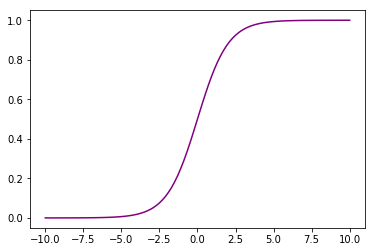

In [6]:
plt.plot(x,y,c='Purple')
plt.show()

In [7]:
data=pd.read_csv("bid.csv")
data.head()

,number,win_loss
0,100,1
1,120,1
2,150,1
3,170,1
4,200,1


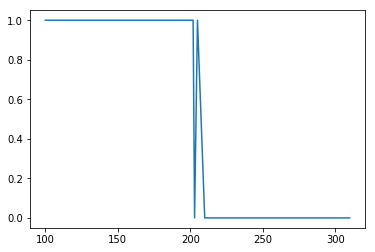

In [8]:
x=data["number"].values
y=data["win_loss"].values
plt.plot(x,y)

In [9]:
data.shape

(16, 2)

In [10]:
data.describe()

,number,win_loss
count,16.00000,16.000000
mean,213.12500,0.500000
std,62.14593,0.516398
min,100.00000,0.000000
25%,192.50000,0.000000
50%,204.00000,0.500000
75%,255.00000,1.000000
max,310.00000,1.000000


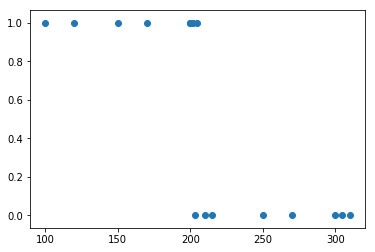

In [11]:
plt.scatter(x,y)

In [12]:
n=len(x)
x=x.reshape(n,1)
np.ndim(x)

2

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
log_reg=LogisticRegression(C=1.0,solver='lbfgs',multi_class='ovr')#one-vs-rest (OvR)
log_reg.fit(x,y)
log_predict=log_reg.predict(x)

In [15]:
log_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [16]:
print(log_reg.predict_proba([[200]]))

[[0.08194444 0.91805556]]


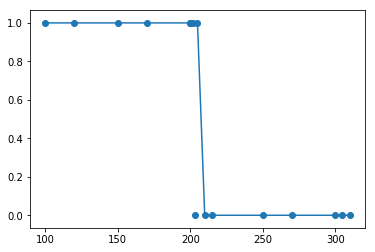

In [17]:
plt.scatter(x,y)
plt.plot(x,log_predict)

In [18]:
data=pd.read_csv("framingham.csv")

In [19]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [20]:
data.shape

(4238, 16)

In [21]:
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [22]:
data.index

RangeIndex(start=0, stop=4238, step=1)

In [23]:
data.isnull().sum().sum()

645

In [24]:
data.drop(['education'],axis=1,inplace=True)

In [25]:
data.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [26]:
data=data.dropna()#remove the null values row

In [27]:
data.isnull().sum().sum()

0

In [28]:
data.shape

(3749, 15)

In [29]:
data.dtypes

male                 int64
age                  int64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [30]:
data.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [31]:
data['cigsPerDay']=data['cigsPerDay'].astype(dtype='int64')

In [32]:
data['BPMeds']=data['BPMeds'].astype(dtype='int64')

In [33]:
data['glucose']=data['glucose'].astype(dtype='int64')

In [34]:
data['totChol']=data['totChol'].astype(dtype='int64')

In [35]:
data['heartRate']=data['heartRate'].astype(dtype='int64')

In [36]:
data.dtypes

male                 int64
age                  int64
currentSmoker        int64
cigsPerDay           int64
BPMeds               int64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol              int64
sysBP              float64
diaBP              float64
BMI                float64
heartRate            int64
glucose              int64
TenYearCHD           int64
dtype: object

In [37]:
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [39]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape
x_train

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
2673,1,36,1,20,0,0,0,0,242,115.0,75.0,25.64,83,83
1215,1,46,0,0,0,0,1,0,305,150.0,88.0,26.82,75,75
4233,1,50,1,1,0,0,1,0,313,179.0,92.0,25.97,66,86
4077,1,43,0,0,0,0,0,0,222,115.0,72.5,25.46,75,69
2365,0,32,1,15,0,0,0,0,242,111.0,70.0,29.84,80,88
680,0,55,0,0,0,0,0,0,225,136.5,85.5,20.56,60,90
711,1,57,1,43,0,0,1,0,185,134.0,90.5,27.77,87,103
1452,1,39,1,60,0,0,0,0,215,112.0,65.0,23.60,59,78
3175,0,50,1,9,0,0,0,0,256,136.5,81.0,23.07,75,78
1570,0,47,0,0,0,0,0,0,187,127.5,90.0,24.63,110,72


In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
log_reg1=LogisticRegression()
log_reg1.fit(x_train,y_train)
y_pred=log_reg1.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [42]:
log_reg1.predict([[1,36,1,20,0,0,0,0,242,115.0,75.0,25.64,83,83]])

array([0], dtype=int64)

In [43]:
y_test.head

<bound method NDFrame.head of 3013    0
3564    1
360     1
4043    1
112     0
1668    0
108     1
3268    0
2641    0
2393    0
2345    0
2054    0
3031    0
2428    0
3586    0
107     1
1419    0
3833    1
3584    0
607     0
3506    0
2631    0
2131    1
202     0
928     0
2940    0
828     0
2461    1
1017    0
1267    0
       ..
4114    0
1746    0
573     1
1559    0
2743    0
4073    0
2163    0
2811    0
648     0
4187    0
3739    0
3781    0
3041    1
483     0
37      0
792     0
1237    0
3891    0
412     0
546     0
3320    1
2234    1
639     0
669     0
1366    0
256     0
1725    0
3492    0
1200    0
2465    0
Name: TenYearCHD, Length: 1125, dtype: int64>

In [49]:
a=pd.read_csv("iris.csv")